# **Heatmap Generation**

In this ipython notebook, heatmaps are generated based on a summary of chemokine expressions from the CCLE database in order to identify the relative expression of CKLF and 40 chemokine markers associated with cancer. 

Data was obtained using as input Summary_Results.xlsx produced from CCLE_expression.ipynb

# Scratch

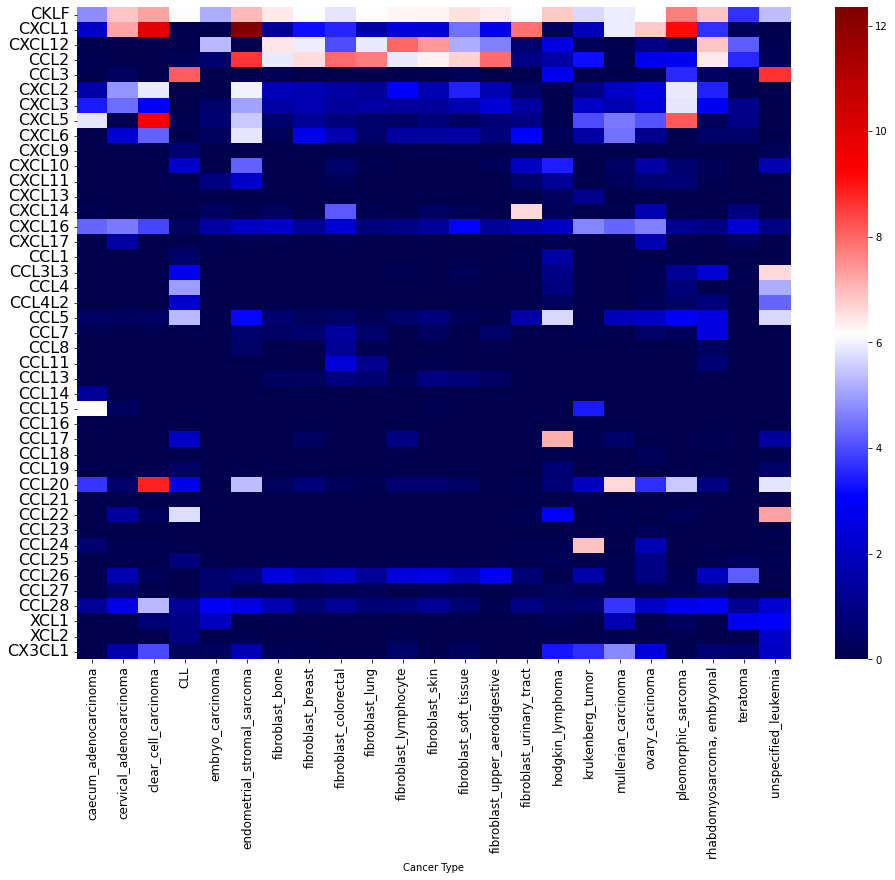

In [ ]:
#from bioinfokit import visuz
#os.chdir(path2 + 'Output/Heatmap')
#new_df = low_cklf.iloc[:, :43]
#visuz.gene_exp.hmap(df=new_df.T, rowclus=False,tickfont=(12,16),colclus=False, dim=(16, 12), show=True)

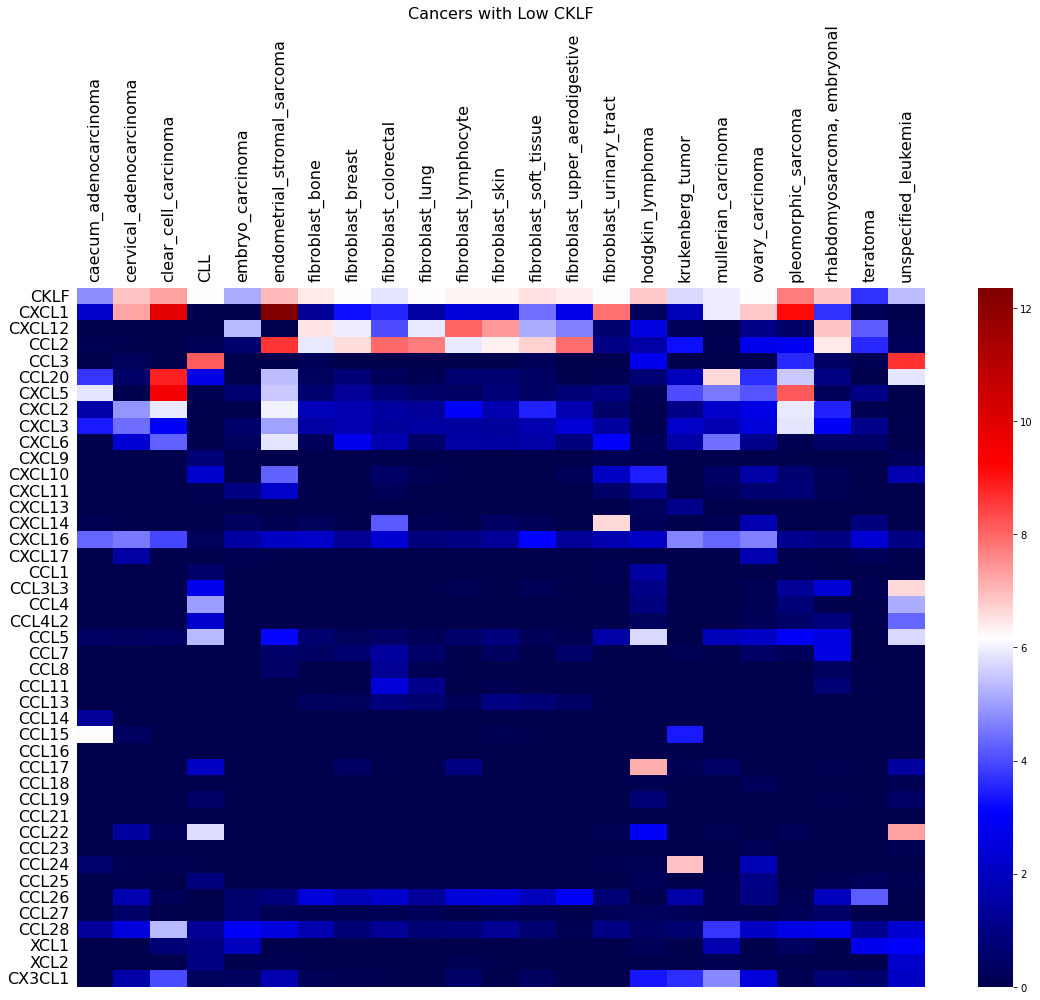

In [ ]:
%matplotlib inline
new_df = low_cklf.iloc[:, :43]
fig, ax = plt.subplots(figsize=(16, 14))
ax = sns.heatmap(new_df.T, cmap= 'seismic', yticklabels=True, xticklabels=True)
plt.tick_params(labelsize=16,
                top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=False,
               labeltop=True)
ax.set_title('Cancers with Low CKLF', fontdict={'fontsize': 16})
plt.xticks(rotation=90)
ax.set(xlabel=None)
plt.tight_layout()
plt.autoscale()
fig.savefig(path2 + 'Output/Heatmap/Low CKLF Cancer Heatmap') 

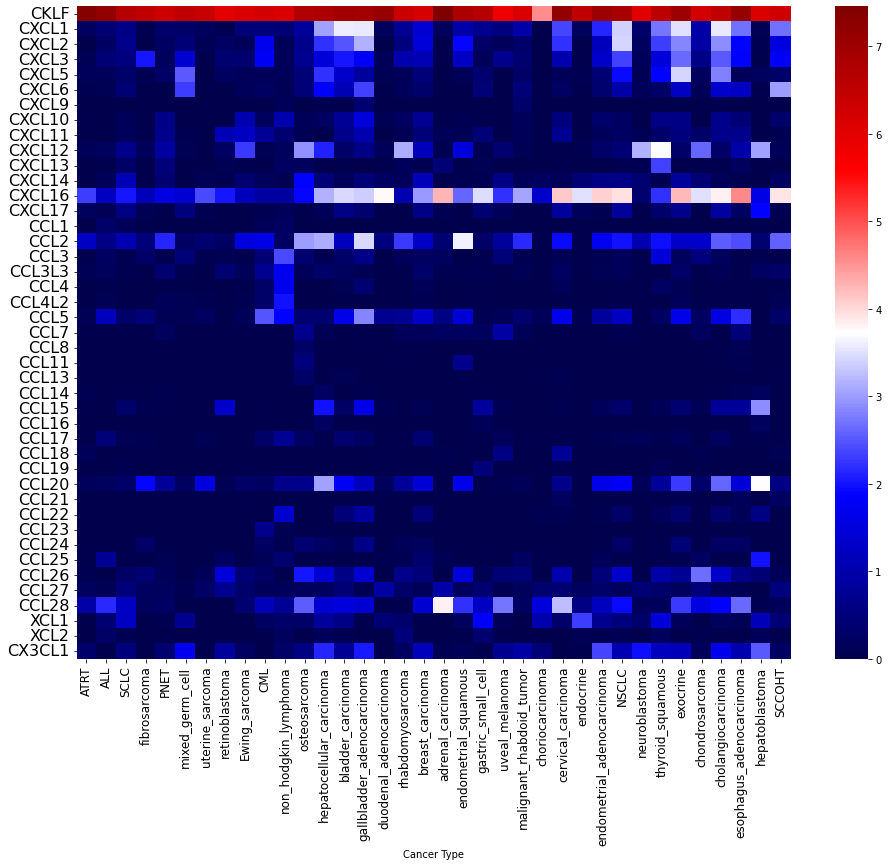

In [ ]:
%matplotlib inline
from bioinfokit import visuz
os.chdir(path2 + 'Output/Heatmap')
first_df = df.iloc[:36, :]
first_df
visuz.gene_exp.hmap(df=first_df.T, rowclus=False,tickfont=(12,16),colclus=False, dim=(16, 12), show=True)#r=600, figname = 'CKLF only')

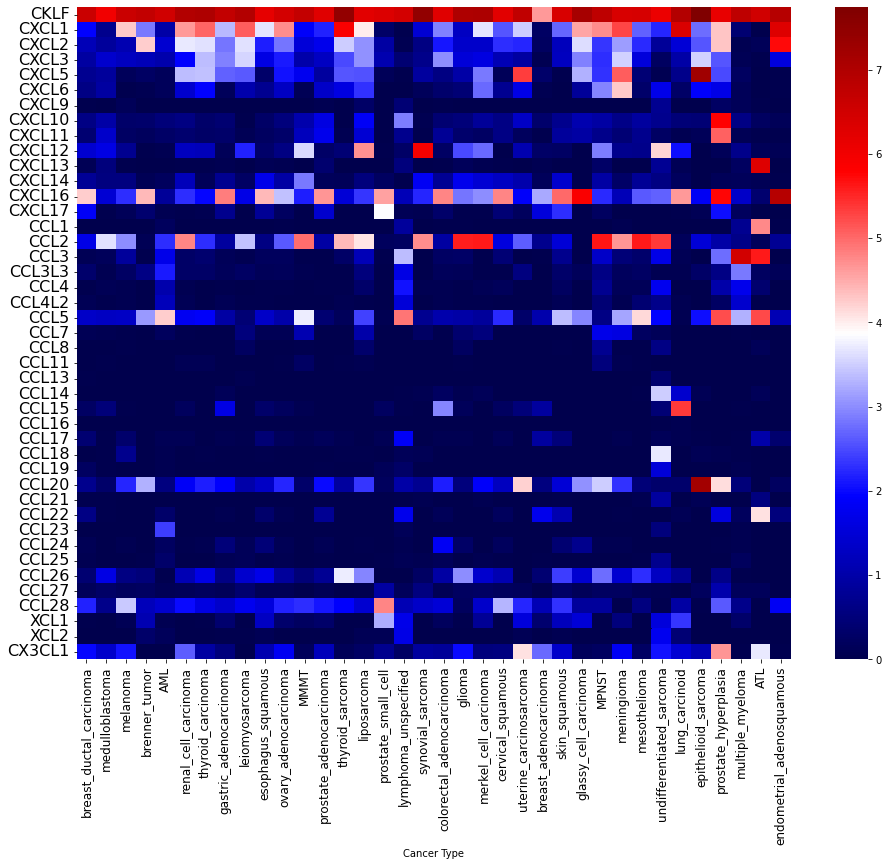

In [ ]:
rest_df = df.iloc[36:, :]
rest_df
visuz.gene_exp.hmap(df=rest_df.T, rowclus=False, colclus=False, dim=(16, 12), tickfont=(12, 16), show=True)# r=600, figname = 'CKLF and Other')

# Heatmap

Generate a heatmap for all 41 gene expressions over the 95 various cancer types.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd, statistics, matplotlib.pyplot as plt, math, numpy as np
from scipy import stats
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#install bioinfokit package 
#!pip install bioinfokit

Mounted at /content/drive


In [45]:
#import input files
path2 = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Output/'
summary_df = pd.read_excel(path2 + 'Cancer Summary/Summary_Results.xlsx', header=0)
summary_df = summary_df.set_index('Cancer Type')

#helper function to plot heatmaps
def plot_heatmap(df, title, filename):
  fig, ax = plt.subplots(figsize=(16, 14))
  ax = sns.heatmap(df.T, cmap= 'seismic', yticklabels=True, xticklabels=True)
  plt.tick_params(labelsize=16,
                  top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=True,
                labelbottom=False,
                labeltop=True)
  ax.set_title(title, fontdict={'fontsize': 16})
  plt.xticks(rotation=90)
  ax.set(xlabel=None)
  plt.tight_layout()
  plt.autoscale()
  fig.savefig(path2 + 'Heatmap/' + filename) 
  return

#helper function to plot heatmaps without any labels
def plot_heatmap_no_labels(df, title, filename):
  fig, ax = plt.subplots(figsize=(16, 14))
  ax = sns.heatmap(df.T, cmap= 'seismic', yticklabels=False, xticklabels=False)
  plt.tick_params(labelsize=16,
                  top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=False,
                labelbottom=False,
                labeltop=False)
  plt.xticks(rotation=90)
  ax.set(xlabel=None)
  plt.tight_layout()
  plt.autoscale()
  fig.savefig(path2 + 'Heatmap/' + filename) 
  return

def plot_final_heatmap(df, filename, colormap):
  title = ' '
  fig, ax = plt.subplots(figsize=(24, 16), gridspec_kw=dict(top=1, bottom=0))
  ax = sns.heatmap(df.T, cmap= colormap, vmin=0, vmax= 12.5, yticklabels=True, xticklabels=True, square=True, cbar=True,
                  cbar_kws={"orientation":"vertical", "shrink":0.5, "pad": 0.015})
  plt.tick_params(labelsize=12,
                  top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=True,
                labelbottom=False,
                labeltop=True)
  ax.set_title(title, fontdict={'fontsize': 16})
  plt.xticks(rotation=90)
  ax.set(xlabel=None)
  plt.tight_layout()
  plt.show()
  fig.savefig(path2 + 'Heatmap/' + filename) 

last_column = summary_df.pop('CKLF')
summary_df.insert(0, 'CKLF', last_column)

max_gene = summary_df.idxmax(axis=1)
print(max_gene.value_counts())
df = summary_df.copy(deep=True)
df['Top Gene'] = max_gene

CKLF      72
CXCL1      6
CXCL12     6
CCL2       5
CCL3       2
CCL15      1
CCL17      1
CCL24      1
CCL20      1
dtype: int64


# Heatmap for Low CKLF Expression

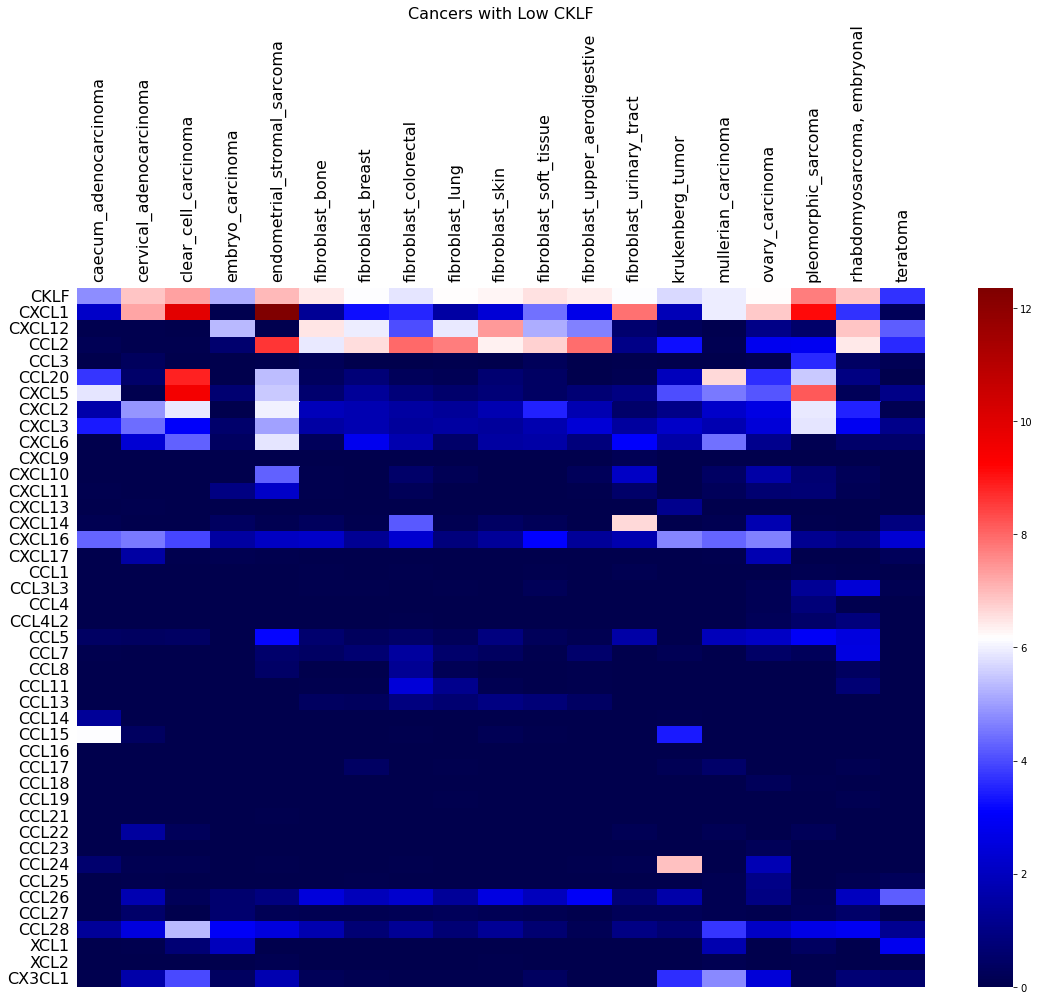

In [ ]:
#create heatmap for low CKLF expression cancers only

low_cklf = df[df['Top Gene']!='CKLF']

last_column = low_cklf.pop('CXCL12')
low_cklf.insert(2, 'CXCL12', last_column)

last_column = low_cklf.pop('CCL2')
low_cklf.insert(3, 'CCL2', last_column)

last_column = low_cklf.pop('CCL3')
low_cklf.insert(4, 'CCL3', last_column)

last_column = low_cklf.pop('CXCL5')
low_cklf.insert(5, 'CXCL5', last_column)

last_column = low_cklf.pop('CCL20')
low_cklf.insert(5, 'CCL20', last_column)

new_df = low_cklf.iloc[:, :43]
new_df = new_df.drop(index=['CLL', 'fibroblast_lymphocyte', 'hodgkin_lymphoma', 'unspecified_leukemia'])
#plot_heatmap_no_labels(new_df, "Cancers with Low CKLF", 'low_cklf_no_labels')
plot_heatmap(new_df, 'Cancers with Low CKLF', 'low_cklf_no_hem')

# Heatmaps for High CKLF with no associated vs. associated genes

In [ ]:
# find the gene with max expression excluding CKLF
exclude_cklf_df = df.iloc[: , 1:]
max_gene_exp = exclude_cklf_df.max(axis=1)
df['Max Gene'] = max_gene_exp
cklf_df = df[df['Top Gene'] == 'CKLF'] #cklf_df where top gene is CKLF
print(df['Top Gene'].value_counts())
cklf_df = cklf_df.drop(columns='Top Gene')
cklf_df

CKLF      72
CXCL1      6
CXCL12     6
CCL2       5
CCL3       2
CCL15      1
CCL17      1
CCL24      1
CCL20      1
Name: Top Gene, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1,Max Gene
Cancer Type,,,,,,,,,,,,,,,,,,,,,
adrenal_carcinoma,7.456231,0.189034,0.042644,0.042644,0.028569,0.014355,0.000000,0.042644,0.137504,0.070389,...,0.000000,0.000000,0.097611,0.000000,0.933573,3.815575,0.000000,0.000000,0.084064,4.254745
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966,2.165823
AML,6.530549,0.985216,1.438383,1.052463,0.165016,0.178055,0.020278,0.500943,0.293863,0.063978,...,2.411297,0.236629,0.305281,0.030866,0.099133,1.421904,0.081973,0.173210,0.029871,4.256924
ATL,6.505732,0.000000,0.124328,0.042644,0.014355,0.000000,0.056584,0.238787,0.056584,0.124328,...,0.000000,0.000000,0.000000,0.000000,0.163499,0.028569,0.000000,0.000000,3.715893,6.302136
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861,2.305834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thyroid_squamous,6.592314,2.709581,2.321019,1.481272,1.886654,0.290615,0.009523,0.598035,0.335373,3.717050,...,0.000000,0.064023,0.042236,0.990186,0.346562,0.148492,1.510356,0.181989,1.194951,3.717050
undifferentiated_sarcoma,6.085977,2.214125,0.831877,0.214125,0.070389,1.718088,0.748461,0.722466,0.263034,4.177918,...,0.516015,0.000000,0.722466,1.292782,0.070389,0.056584,1.560715,1.761285,2.063503,5.384050
uterine_carcinosarcoma,6.758623,3.482848,2.238787,0.933573,5.326609,1.673556,0.000000,1.327687,0.189034,1.070389,...,0.000000,0.000000,0.000000,0.000000,0.163499,2.232661,1.545968,0.097611,4.095080,5.326609


In [ ]:
high_cklf_only_df = cklf_df[cklf_df['Max Gene'] < 4.0]
inverted_df = high_cklf_only_df.T.iloc[:43, :]
last_column = inverted_df.pop('neuroblastoma')
inverted_df.insert(0, 'neuroblastoma', last_column)

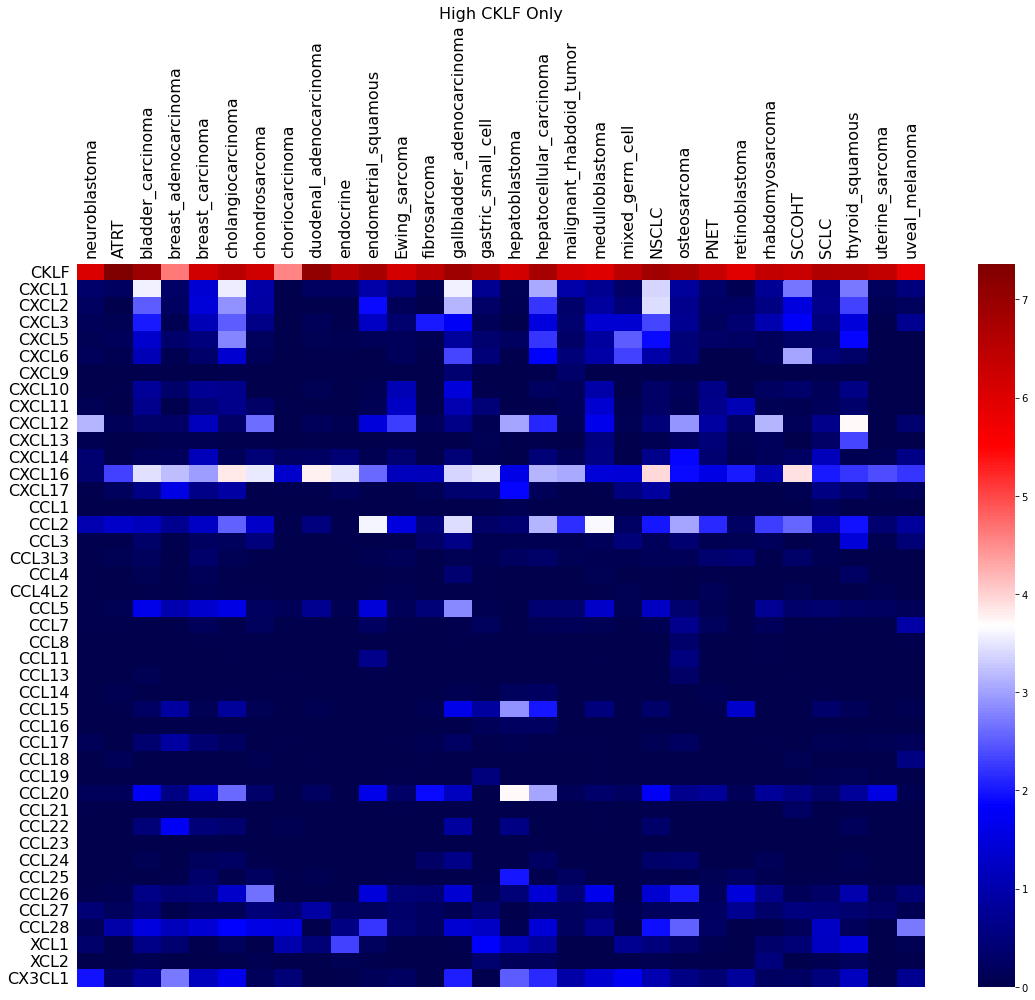

In [ ]:
inverted_df = inverted_df.drop(columns=['ALL', 'CML', 'non_hodgkin_lymphoma'])
#plot_heatmap_no_labels(inverted_df.T, 'High CKLF Only', 'High CKLF Only_no_labels')
plot_heatmap(inverted_df.T, 'High CKLF Only', 'High CKLF Only_no_hem')

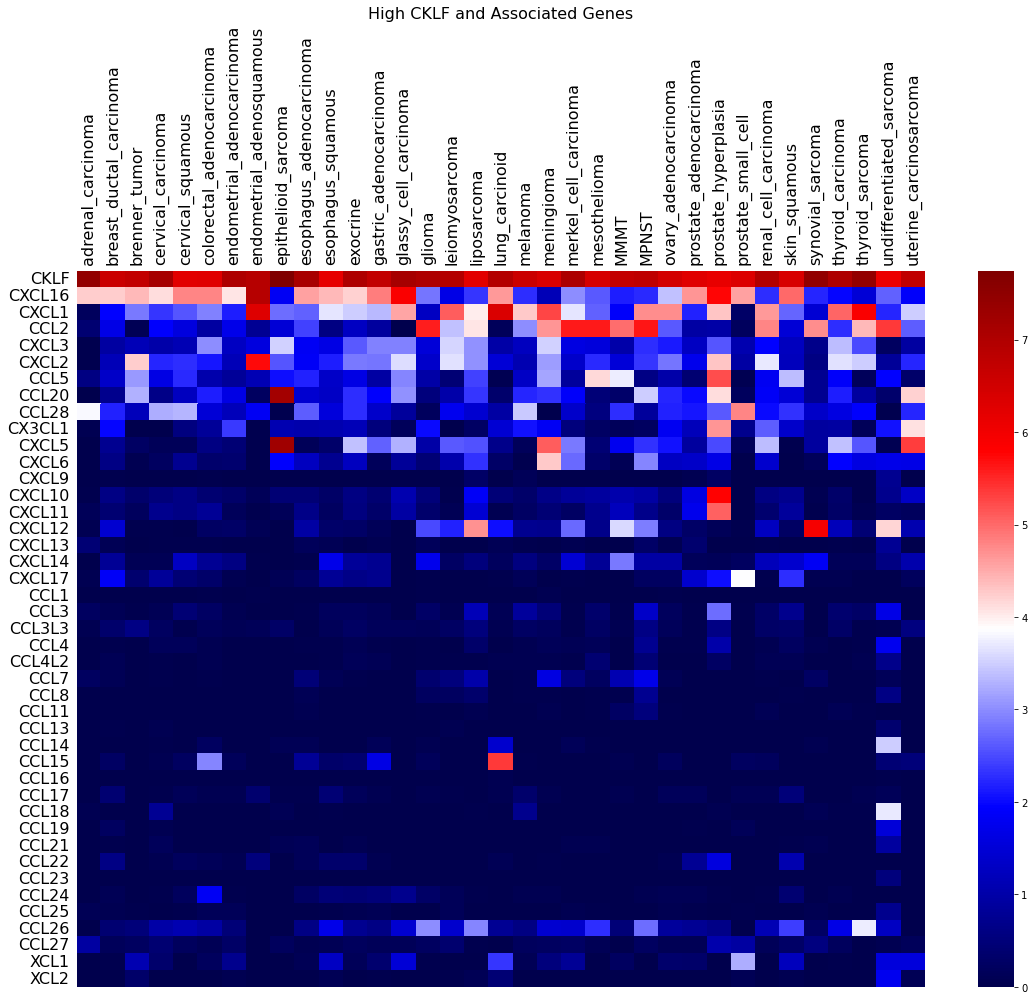

In [ ]:
high_cklf_other_df = cklf_df[cklf_df['Max Gene'] >= 4.0]
high_cklf_other_df = high_cklf_other_df.iloc[:, :43]
gene_order = ['CXCL16', 'CXCL1', 'CCL2', 'CXCL2', 'CCL5', 'CCL20', 'CCL28', 'CX3CL1']

for i in range(len(gene_order)):
  gene = gene_order[i]
  column = high_cklf_other_df.pop(gene)
  high_cklf_other_df.insert(i+2, gene, column)

high_cklf_other_df = high_cklf_other_df.drop(index=['AML', 'ATL', 'lymphoma_unspecified', 'multiple_myeloma'])
#plot_heatmap_no_labels(high_cklf_other_df, 'High CKLF and Associated Genes', 'High CKLF and Associated Genes_no_labels')
plot_heatmap(high_cklf_other_df, 'High CKLF and Associated Genes', 'High CKLF and Associated Genes_no_hem')

In [ ]:
# find if each cancer has any cell line with mycn amp or not

path = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Output/Cancer by Cell Lines/'
import os
files = os.listdir(path)
excel_files = [f for f in files if f[-4:] == 'xlsx']
excel_files.sort(key=str.lower)

print(len(excel_files))

for file_name in excel_files:
  cancer_name = file_name[:file_name.index('.xlsx')]
  df =pd.read_excel(path + file_name, header=0)
  df = df['MYCN Amp?']
  if len(df.unique()) > 1:
    print(df.unique())
  if 'MYCN_amp' in df.unique():
    print(file_name[:-5] + ' is MYCN amplified')
  

103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


['basal_B' 'basal_A' 'luminal' 'luminal_HER2_amp' 'HER2_amp' 'basal']
['basal_A' 'HER2_amp' 'luminal' 'basal_B' 'luminal_HER2_amp' 'basal' nan]
[nan 'MSI']
['EWS_FLI' 'EWS_ERG' nan 'EWS_FEV']
['MYC_exp' 'MYC_amp' 'non_MYC' nan]
[nan 'NF1']
[nan 'MYCN_amp']
neuroblastoma is MYCN amplified
[nan 'PAX3_FKHR']


# New Heatmaps Manually from Excel Sheets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


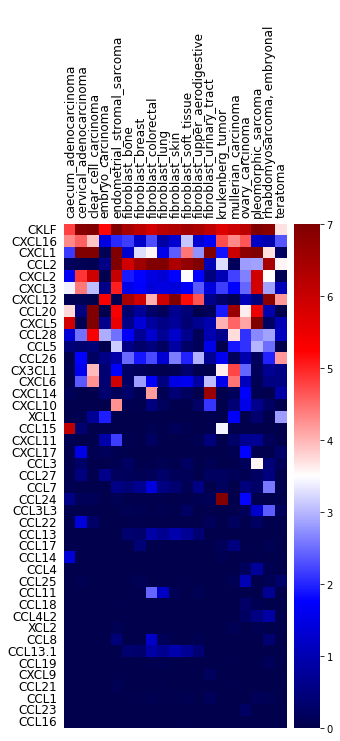

In [ ]:
low_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/Chart Low MR.xlsx', header=0)
low_df = low_df.set_index('Cancer Type ')

#plot_heatmap(df_mod, 'CKLF by Group', 'CKLF by Group')
filename = 'Low CKLF'
title = ' '
size_ratio = 84/19*16
fig, ax = plt.subplots(figsize=(9, 7), gridspec_kw=dict(top=1, bottom=0))
ax = sns.heatmap(low_df.T, cmap= 'seismic', vmin=0, vmax= 7, yticklabels=True, xticklabels=True, square=True, cbar=True, 
                 cbar_kws={"orientation":"vertical", "shrink":1, "pad": 0.015})
plt.tick_params(labelsize=12,
                top=False,
              bottom=False,
              left=False,
              right=False,
              labelleft=True,
              labelbottom=False,
              labeltop=True)
#fig.set_size_inches(10, 6) # for 1x2
ax.set_title(title, fontdict={'fontsize': 16})
plt.xticks(rotation=90)
ax.set(xlabel=None)
plt.tight_layout()

#plt.cm.set_clim(0,7)  # identical to caxis([-4,4]) in MATLAB
plt.show()
#plt.autoscale()
fig.savefig(path2 + 'Heatmap/' + filename, orientation = 'portrait', transparent=False) 
#plot_heatmap(low_df, 'Low CKLF', 'Low CKLF')

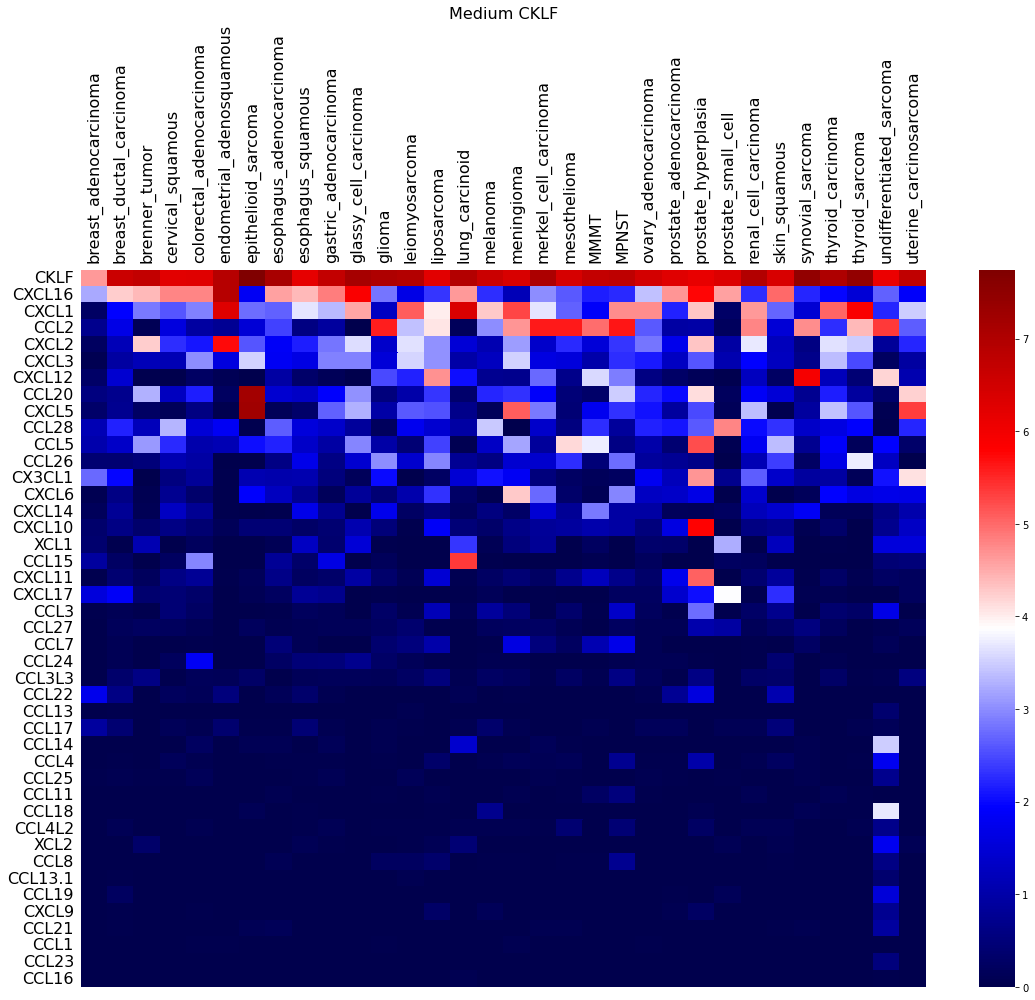

In [ ]:
med_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/Chart Middle MR .xlsx', header=0)
med_df = med_df.set_index('Cancer Type ')
plot_heatmap(med_df, 'Medium CKLF', 'Medium CKLF')

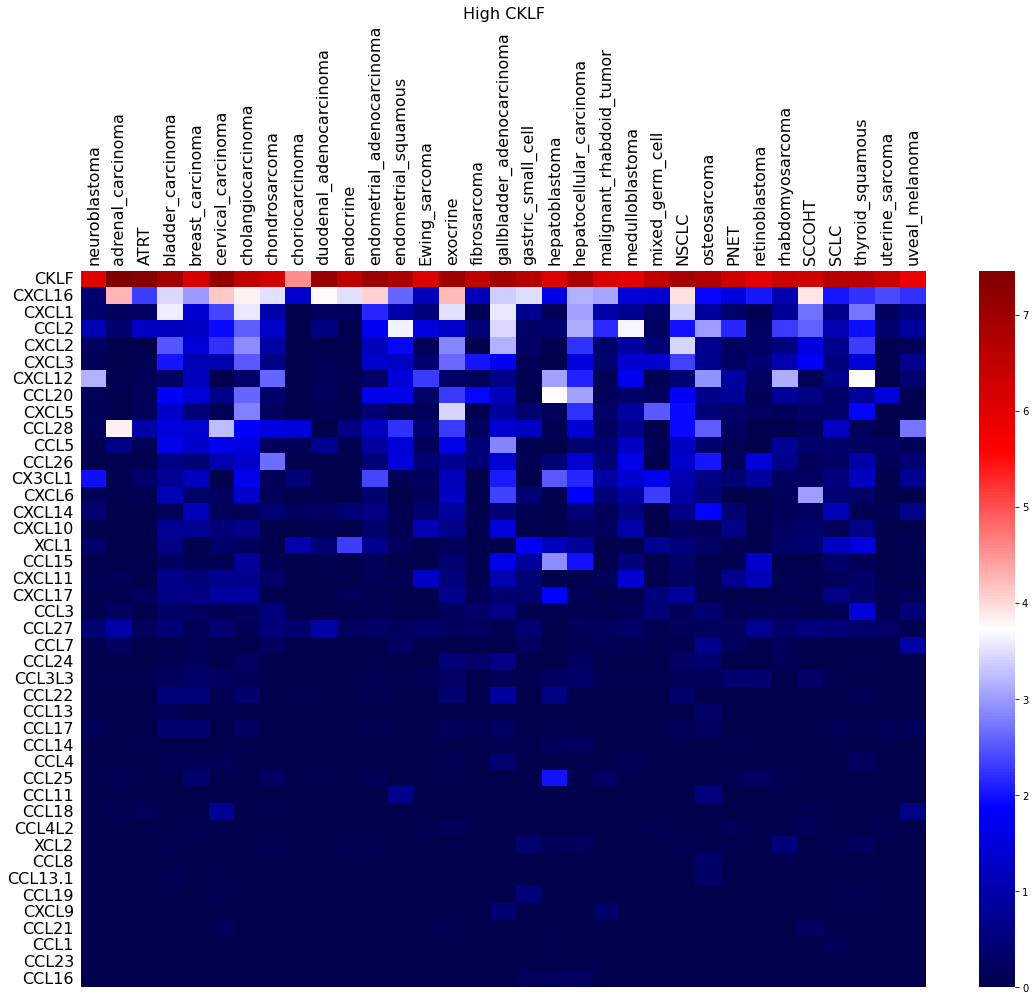

In [ ]:
high_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/Chart High MR.xlsx', header=0)
high_df = high_df.set_index('Cancer Type ')
plot_heatmap(high_df, 'High CKLF', 'High CKLF')

In [5]:
excel = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/GroupOrders.xlsx'
list_df = pd.read_excel(excel, header=1)
cancer_group_order = list_df['Cancer group'].tolist()
chemokine_order = list_df['Unnamed: 6'].dropna().tolist()
cancer_group_order2 = [x.lower().replace(' ', '_') if x.isupper()==False else x for x in cancer_group_order ]
rhab_i = cancer_group_order2.index('rhabdomyosarcoma,_embryonal')
cancer_group_order2[rhab_i] = 'rhabdomyosarcoma, embryonal'
ewing_i = cancer_group_order2.index('ewing_sarcoma')
cancer_group_order2[ewing_i] = 'Ewing_sarcoma'
df_mod = df.copy(deep=True)
df_mod = df_mod.reindex(cancer_group_order2)
df_mod = df_mod.reindex(columns=chemokine_order)
df_mod

,CKLF,CXCL16,CXCL1,CCL2,CXCL2,CXCL3,CXCL12,CCL20,CXCL5,CCL28,...,CCL4L2,XCL2,CCL8,CCL13,CCL19,CXCL9,CCL21,CCL1,CCL23,CCL16
Cancer Type,,,,,,,,,,,,,,,,,,,,,
neuroblastoma,6.039653,0.363080,0.323975,1.060475,0.213739,0.134398,3.160630,0.156350,0.095520,0.133102,...,0.040924,0.025218,0.003582,0.001825,0.000000,0.003695,0.055109,0.021754,0.000000,0.000000
ATRT,7.359617,2.305834,0.209926,1.274427,0.027501,0.112865,0.143727,0.169599,0.161471,0.953610,...,0.028051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024866,0.027501,0.000000
bladder_carcinoma,6.952316,3.463464,3.585028,1.167736,2.501699,2.026065,0.289440,1.762780,1.336554,1.504543,...,0.038560,0.066594,0.000772,0.091423,0.019169,0.031032,0.021503,0.006077,0.008257,0.001160
breast_carcinoma,6.200281,2.977591,1.401671,1.261874,1.465632,1.101226,1.155270,1.438584,0.491867,1.396207,...,0.060235,0.000000,0.030548,0.001143,0.020792,0.016277,0.003958,0.010083,0.002816,0.000000
cholangiocarcinoma,6.516716,3.825455,3.564688,2.537714,2.891495,2.512168,0.268175,2.607256,2.816167,1.846707,...,0.038446,0.021890,0.043971,0.003929,0.018257,0.040680,0.038175,0.000000,0.008953,0.009594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mullerian_carcinoma,5.934517,4.309613,5.962780,0.137504,2.207893,1.761285,0.056584,6.628336,4.555203,3.729009,...,0.000000,0.097611,0.000000,0.000000,0.042644,0.000000,0.028569,0.000000,0.000000,0.000000
ovary_carcinoma,6.181790,4.649659,6.809436,2.833364,2.626359,2.446936,1.043494,3.625730,4.113965,2.100111,...,0.234005,0.000000,0.035195,0.000000,0.000000,0.000000,0.000000,0.000000,0.232334,0.000000
pleomorphic_sarcoma,7.726218,1.182692,9.165611,2.849999,5.889474,5.838448,0.505891,5.520737,8.184181,2.691534,...,0.526069,0.070389,0.000000,0.000000,0.000000,0.000000,0.000000,0.124328,0.000000,0.000000


In [12]:
df_mod.describe().max

<bound method NDFrame._add_numeric_operations.<locals>.max of             CKLF     CXCL16      CXCL1       CCL2      CXCL2      CXCL3  \
count  84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean    6.490137   2.938085   2.838111   2.538981   1.870635   1.616148   
std     0.663814   1.386703   2.455613   2.257268   1.526173   1.180959   
min     3.699330   0.363080   0.000000   0.000000   0.000000   0.000000   
25%     6.198904   1.888018   0.753311   0.749703   0.574560   0.868909   
50%     6.513175   2.635507   2.678057   1.943953   1.677720   1.434079   
75%     6.912856   4.158116   3.786258   3.624623   2.817954   2.295203   
max     7.745307   6.901591  12.349530   8.614710   6.022146   5.838448   

          CXCL12      CCL20      CXCL5      CCL28  ...     CCL4L2       XCL2  \
count  84.000000  84.000000  84.000000  84.000000  ...  84.000000  84.000000   
mean    1.586442   1.539074   1.534432   1.499297  ...   0.069790   0.067438   
std     1.965843   1.7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


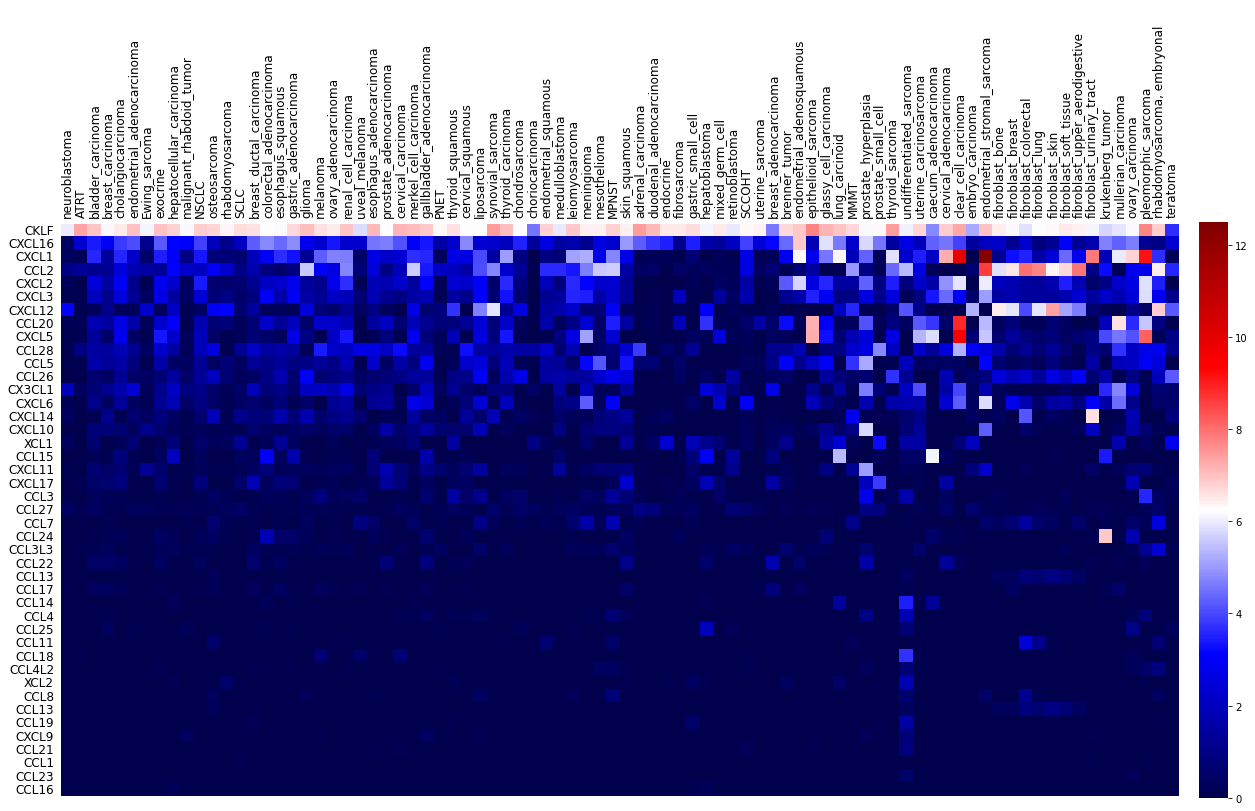

In [46]:
plot_final_heatmap(df_mod, 'CKLF_seismic', 'seismic')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


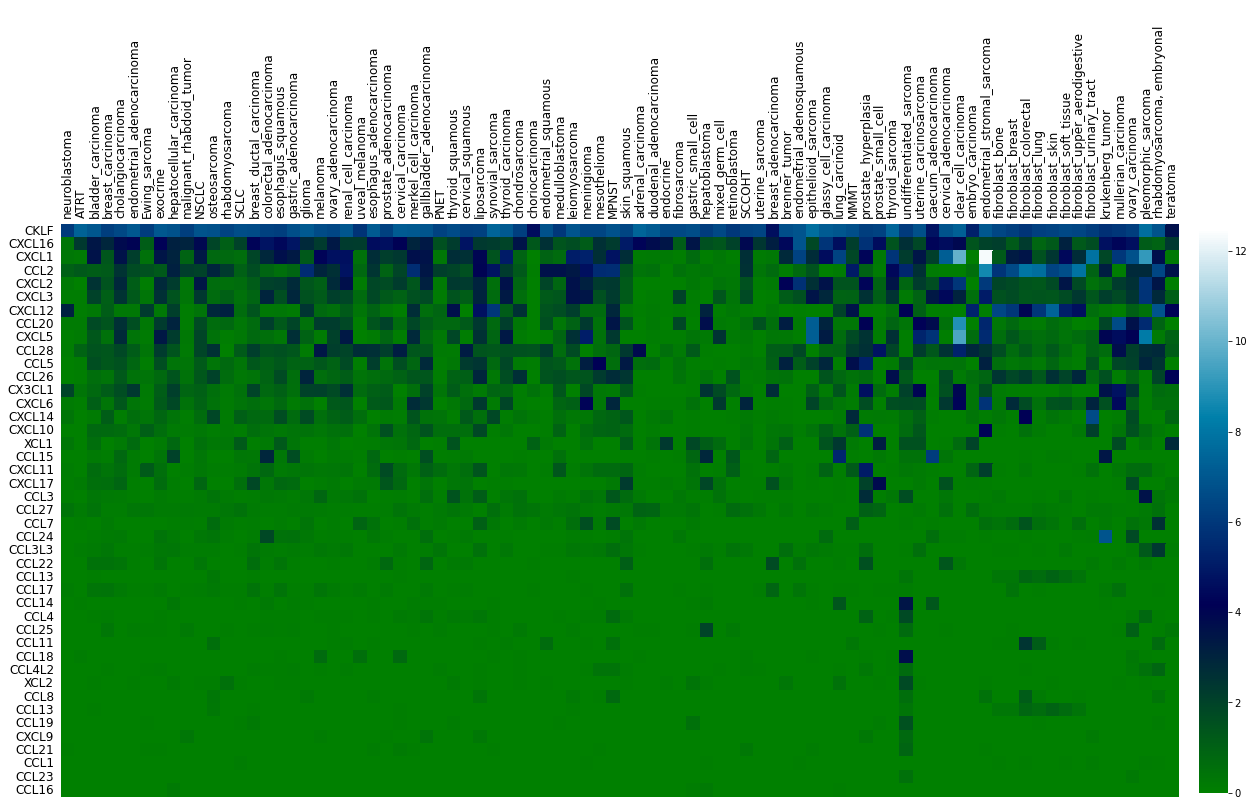

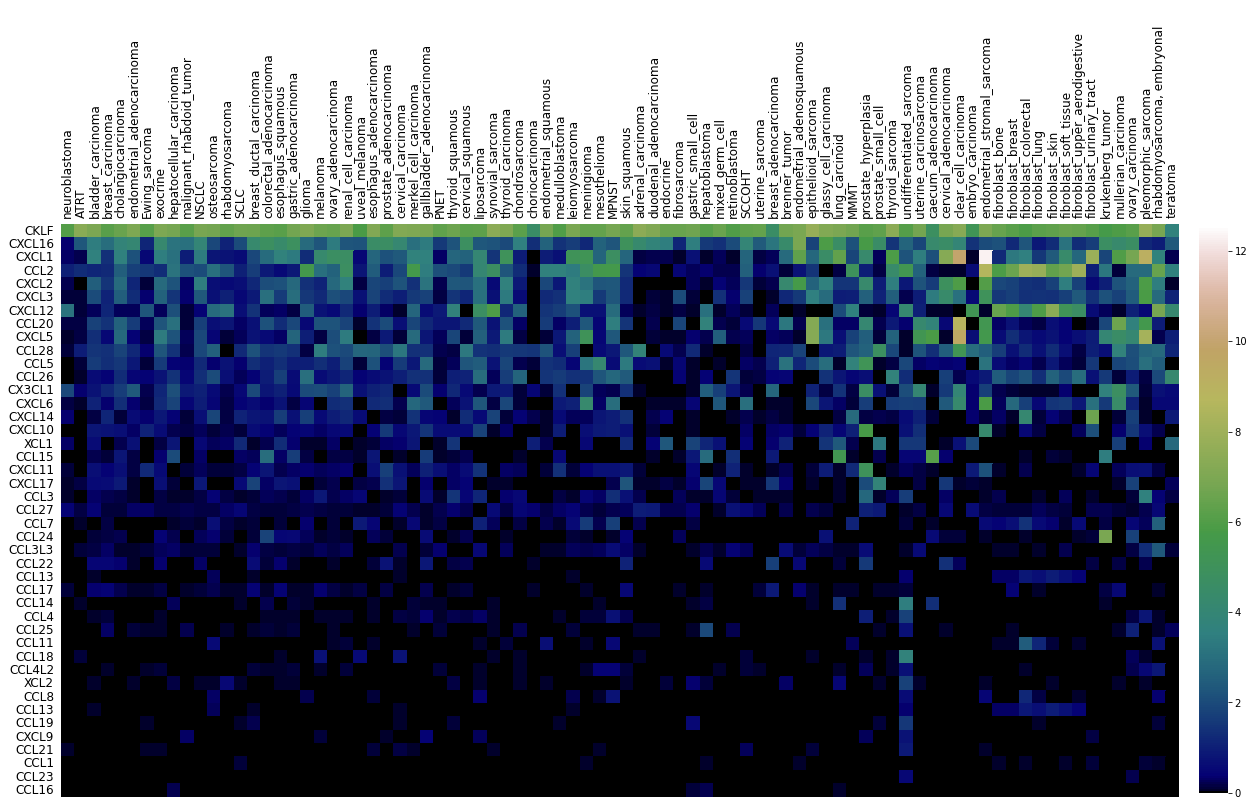

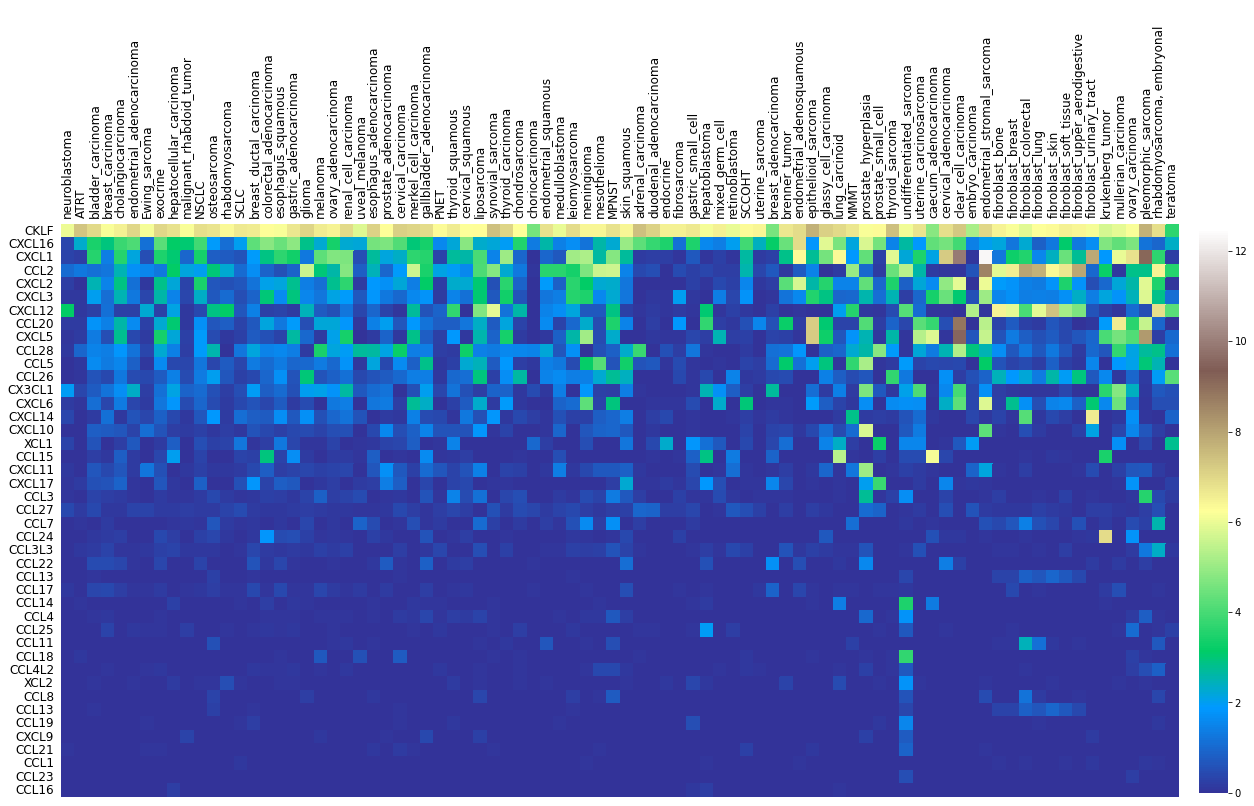

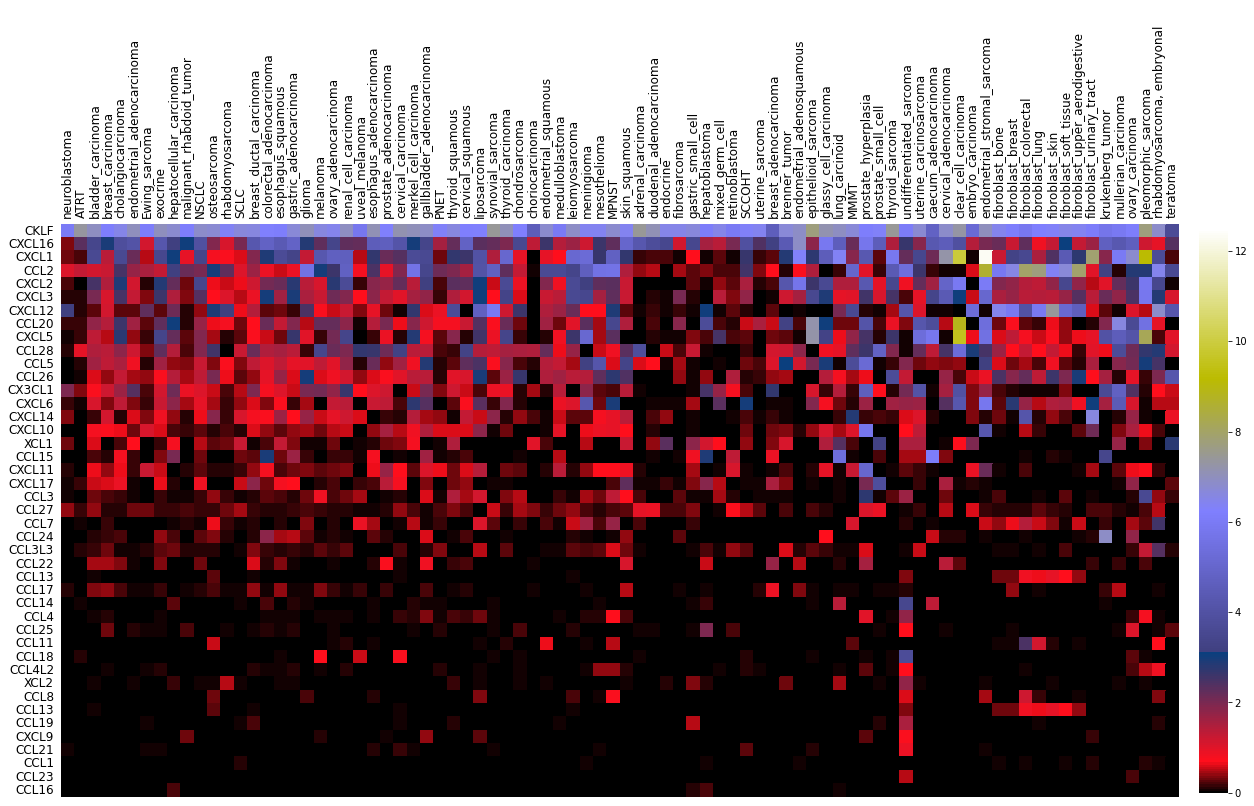

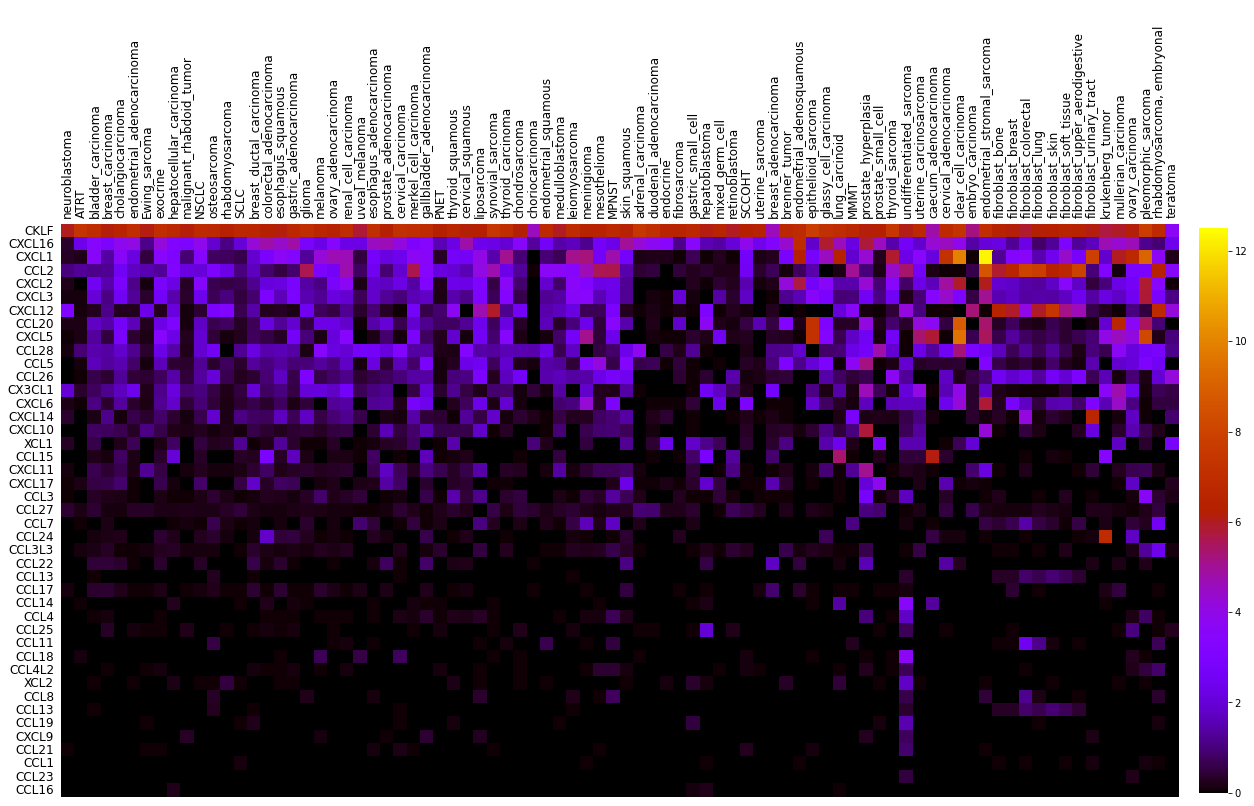

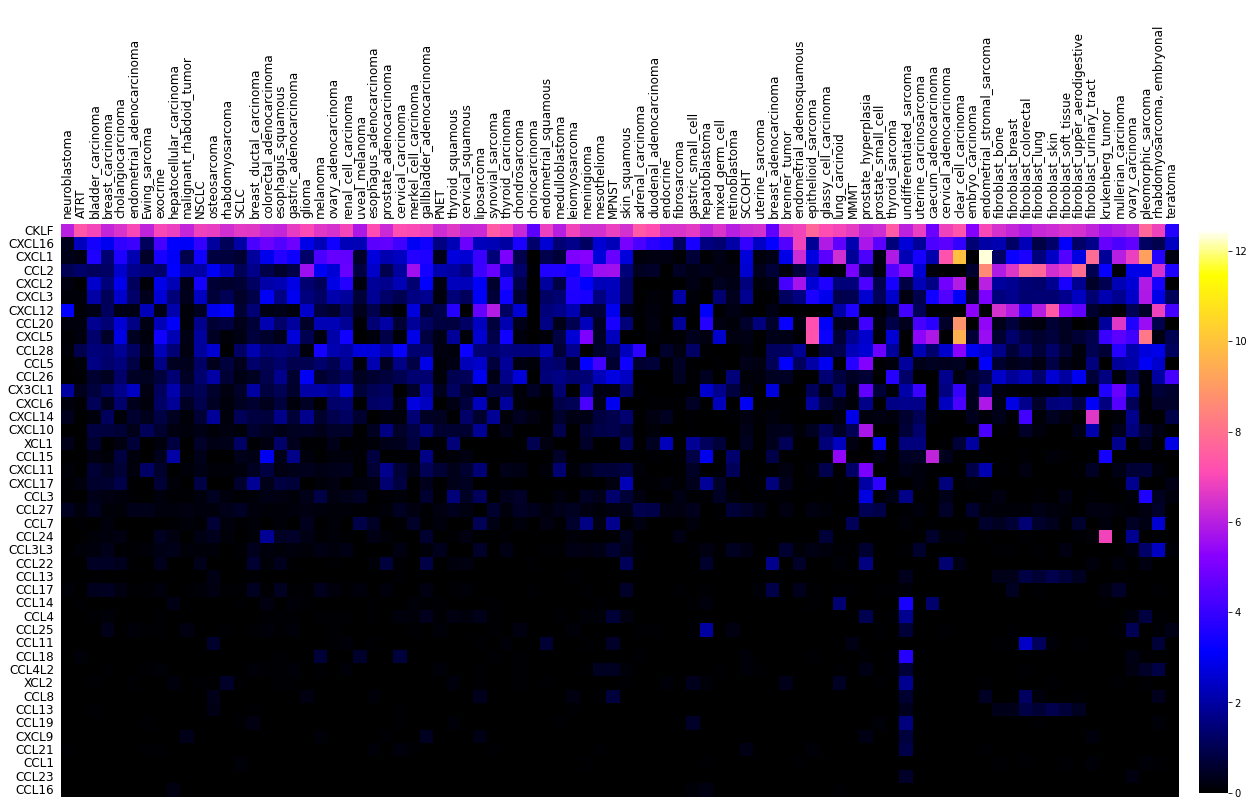

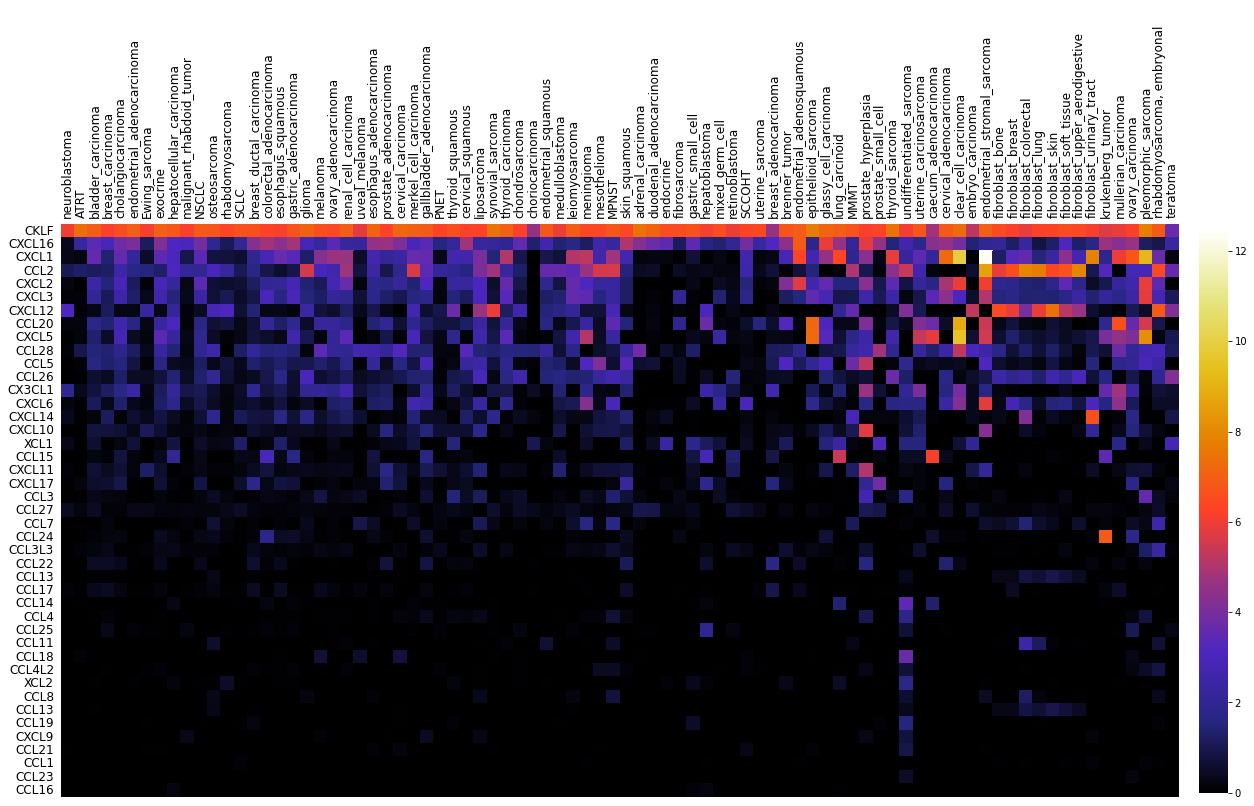

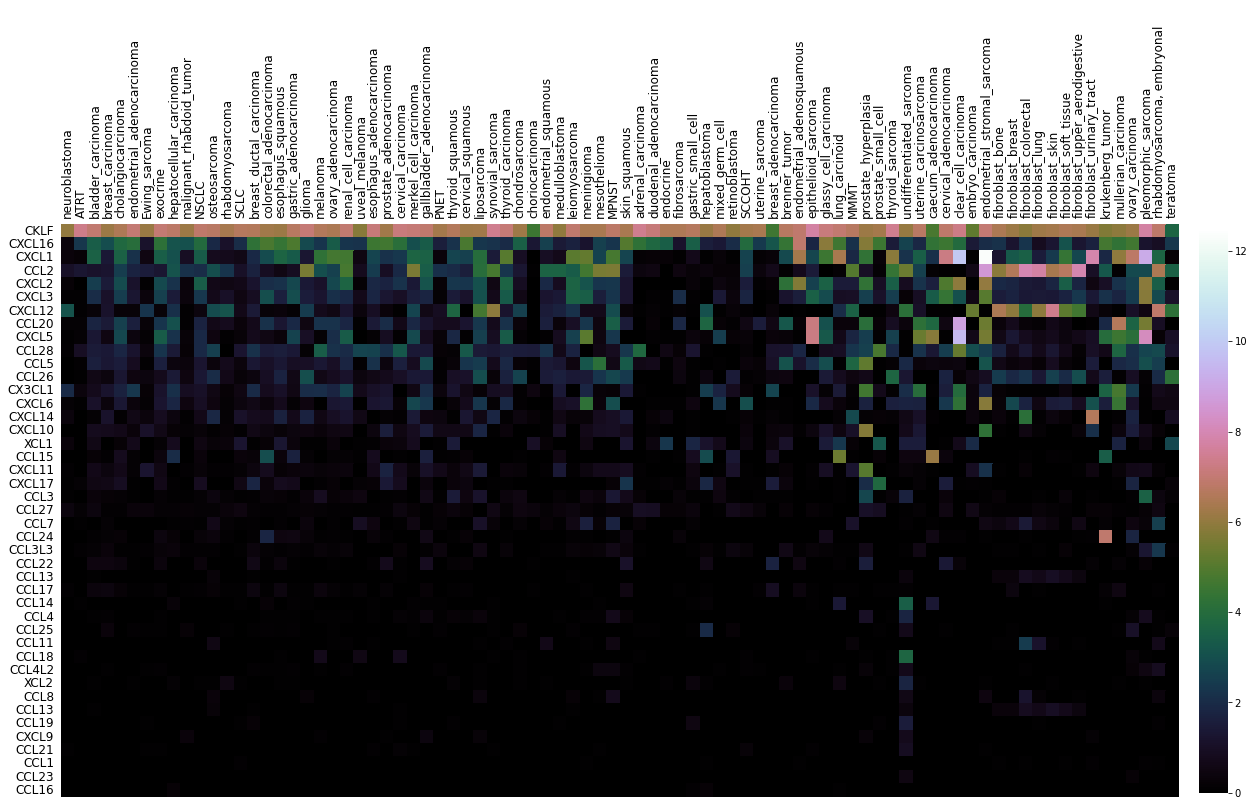

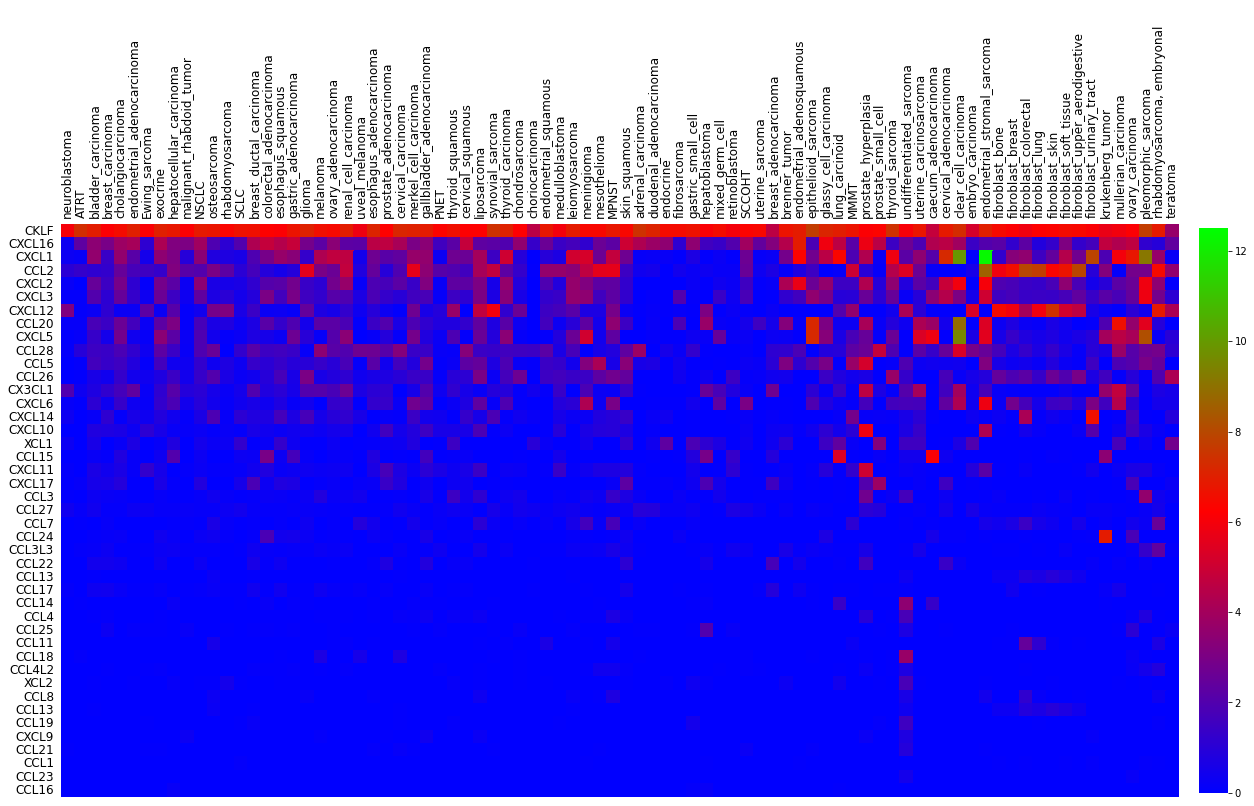

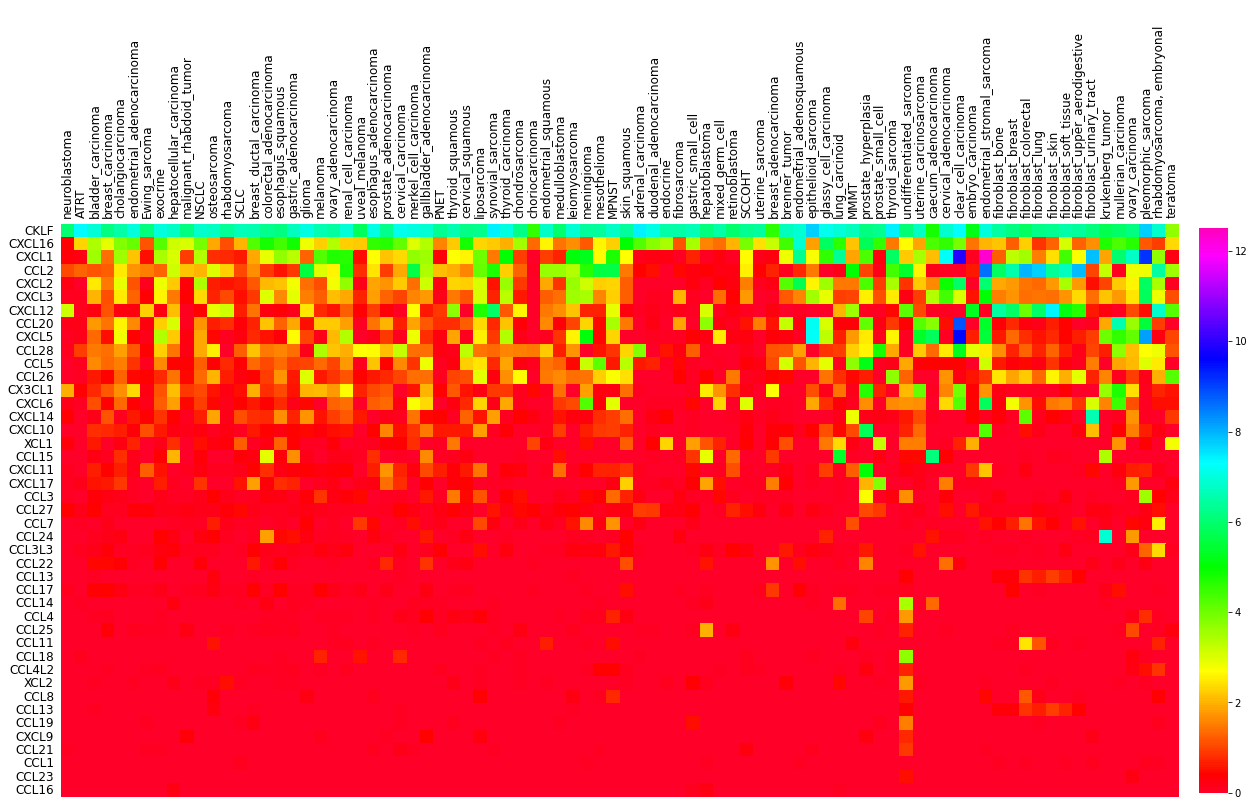

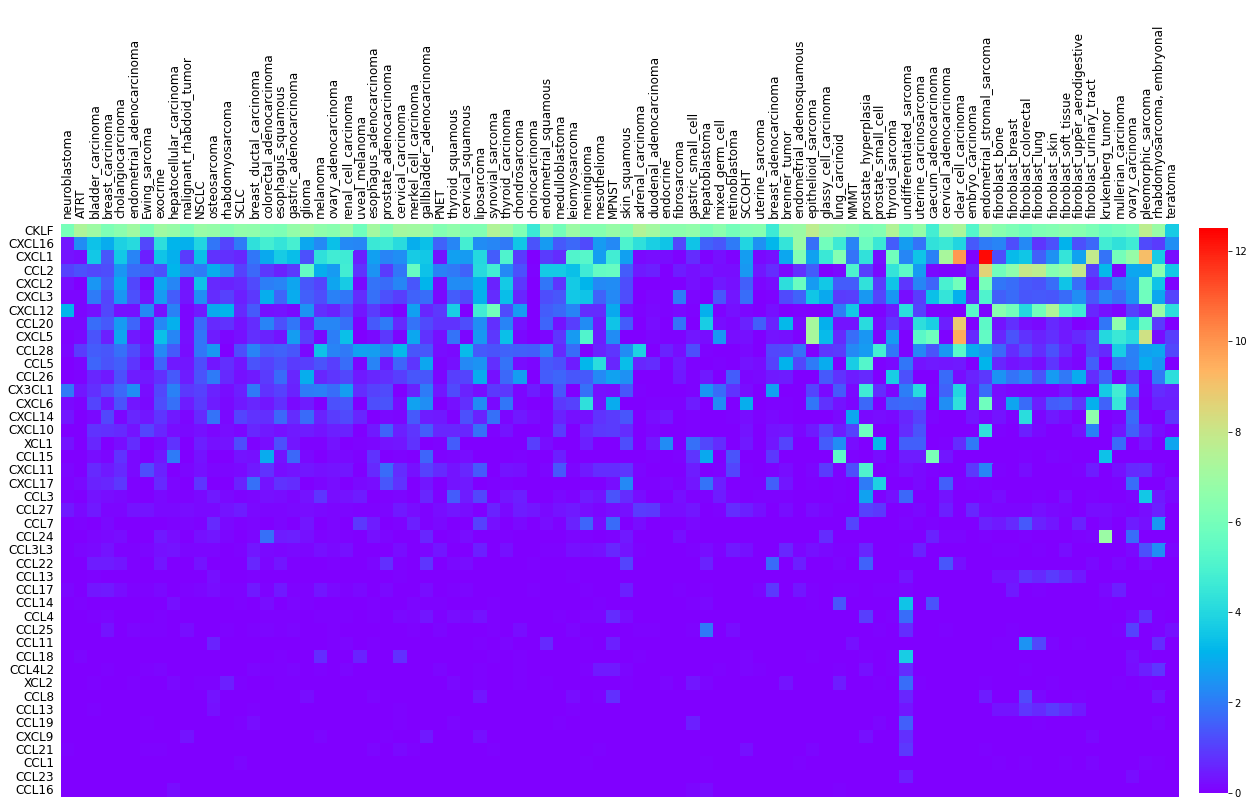

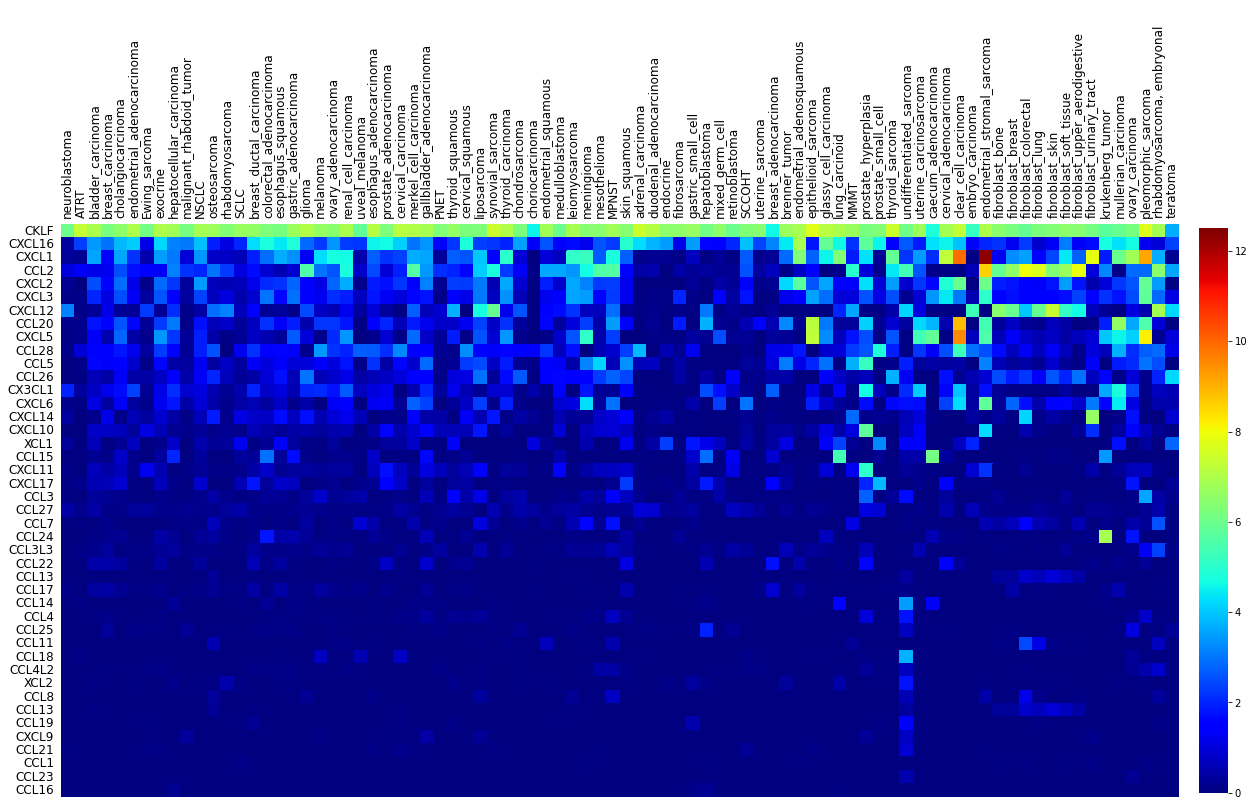

ValueError: ignored

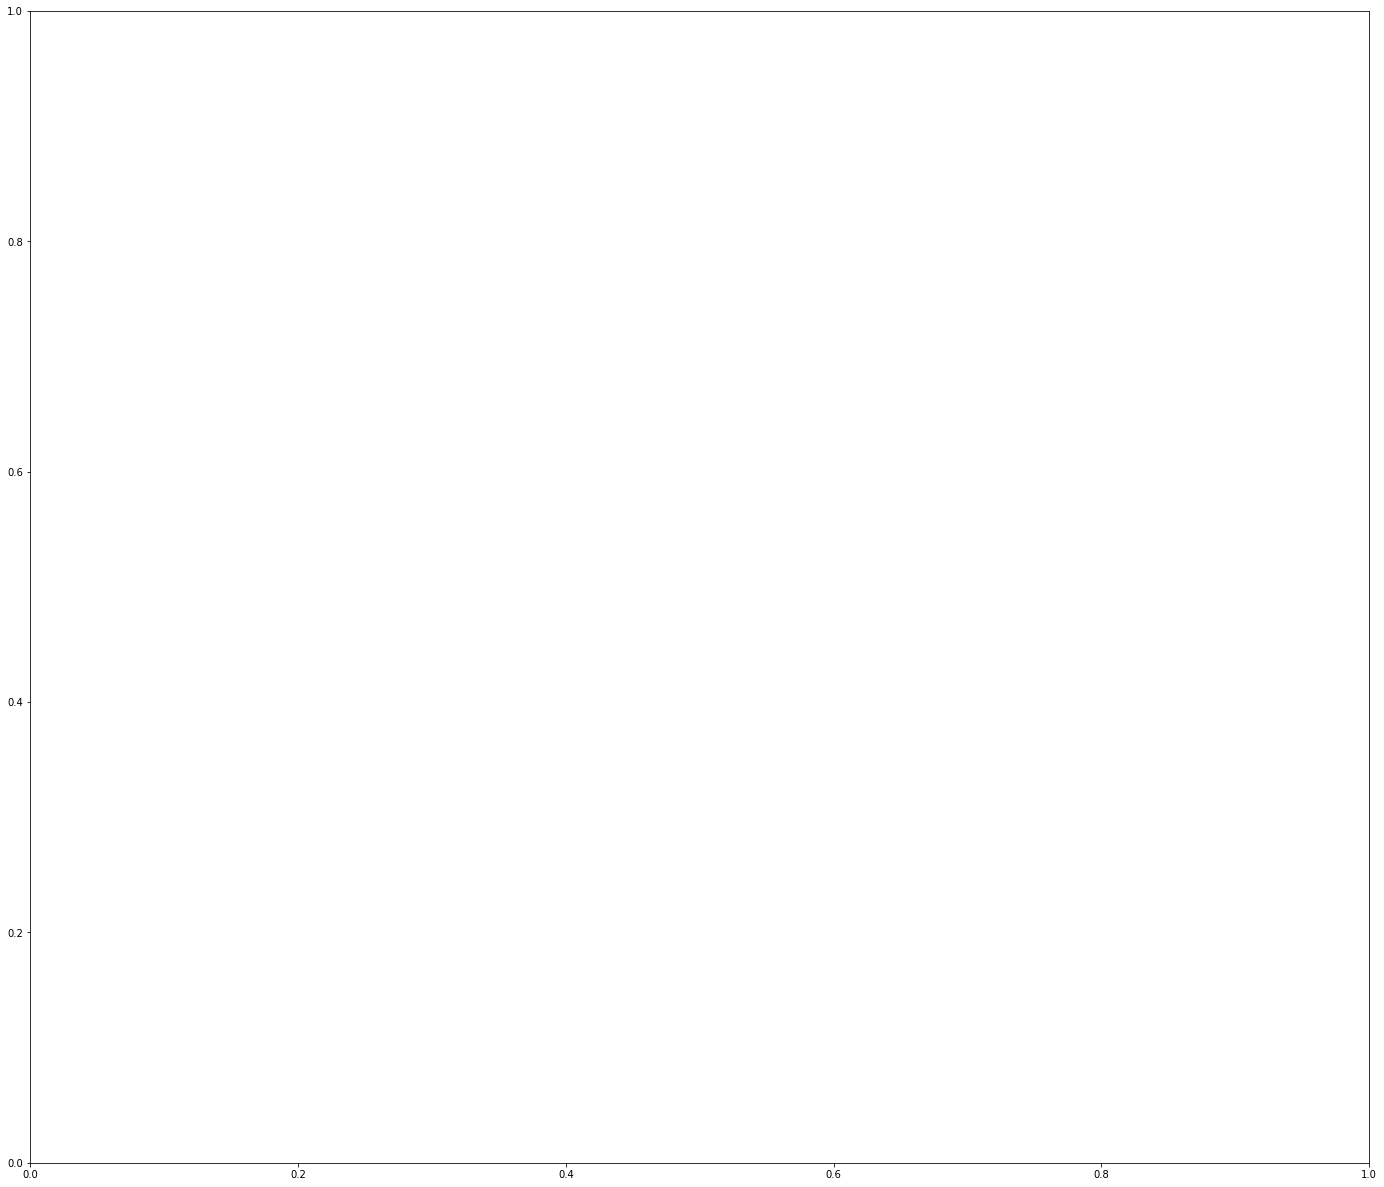

In [39]:
colormaps = ['ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

for c in colormaps:
  name = 'CKLF_heatmap_' + c
  plot_final_heatmap(df_mod, name, c)